# Simulations with Max-Sum, GF(2)

In [1]:
include("headers.jl");

## Convergence: decisional variables

### Fixed Rate

In [38]:
q = 2
n = 480
L = 1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [39]:
sim1 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=100, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)

---- Starting m = 280 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
Finished iter 25
Finished iter 30
Finished iter 35
Finished iter 40
Finished iter 45
Finished iter 50
Finished iter 55
Finished iter 60
Finished iter 65
Finished iter 70
Finished iter 75
Finished iter 80
Finished iter 85
Finished iter 90
Finished iter 95
Finished iter 100


Simulation with n = 480, average over 100 trials
k = [200]
R = [0.42]
Total elapsed time: 11m 33s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 11m 33s. Average runtime per instance: 0m 7s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  100  │    11    │    89    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  11   │    11    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  89   │    0     │    89    │
└───────────────┴───────┴──────────┴──────────┘


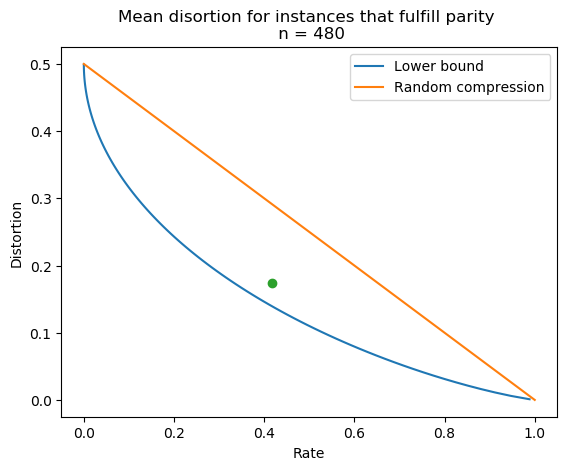

In [40]:
plot(sim1);

#### Varying L
See if there is an optimal value for L

In [33]:
Lvals = exp.(-2:0.6:4) # Log range
times = zeros(length(Lvals))
convergence_rate = zeros(length(Lvals))
q = 2
n = 480
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [34]:
for (l,L) in enumerate(Lvals)
    sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
        navg=60, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)
    print(sim)
    times[l] = sim.totaltime
    convergence_rate[l] = sum(sim.converged[1])/length(sim.converged[1])
end

---- Starting m = 280 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
Finished iter 25
Finished iter 30
Finished iter 35
Finished iter 40
Finished iter 45
Finished iter 50
Finished iter 55
Finished iter 60
Simulation with n = 480, average over 60 trials
k = [200]
R = [0.42]
Total elapsed time: 7m 5s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 7m 5s. Average runtime per instance: 0m 7s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  60   │    11    │    49    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   9   │    9     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  51   │    2     │    49    │
└───────────────┴───────┴──────────┴──────────┘
---- Starting m = 280 ----
Finished iter 5
Finished iter 10
Finished it

Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
Finished iter 25
Finished iter 30
Finished iter 35
Finished iter 40
Finished iter 45
Finished iter 50
Finished iter 55
Finished iter 60
Simulation with n = 480, average over 60 trials
k = [200]
R = [0.42]
Total elapsed time: 5m 8s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 5m 8s. Average runtime per instance: 0m 5s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  60   │    25    │    35    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  25   │    25    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  35   │    0     │    35    │
└───────────────┴───────┴──────────┴──────────┘
---- Starting m = 280 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
Fini

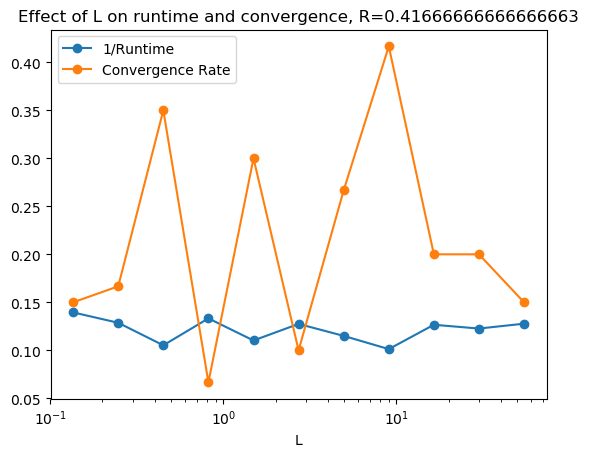

Values of L:[0.14, 0.25, 0.45, 0.82, 1.49, 2.72, 4.95, 9.03, 16.44, 29.96, 54.6]


In [37]:
semilogx(Lvals, 500/times, "o-")
semilogx(Lvals, convergence_rate, "o-")
plt.:xlabel("L")
plt.:legend(["1/Runtime", "Convergence Rate"])
plt.:title("Effect of L on runtime and convergence, R=$(1-m/n)")
println("Values of L:", round.(Lvals,digits=2))

I can't see any trend...

#### With b-reduction

In [41]:
q = 2
n = 480
L = 1.5
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

Remove b=1 constraints

In [42]:
sim6 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=100, convergence=:decvars, maxiter=Int(1e3), nmin=300, b=1, verbose = false)

---- Starting m = 280 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
Finished iter 25
Finished iter 30
Finished iter 35
Finished iter 40
Finished iter 45
Finished iter 50
Finished iter 55
Finished iter 60
Finished iter 65
Finished iter 70
Finished iter 75
Finished iter 80
Finished iter 85
Finished iter 90
Finished iter 95
Finished iter 100


Simulation with n = 480, average over 100 trials
k = [200]
R = [0.42]
Total elapsed time: 11m 30s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 11m 30s. Average runtime per instance: 0m 7s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  100  │    16    │    84    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  16   │    16    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  84   │    0     │    84    │
└───────────────┴───────┴──────────┴──────────┘


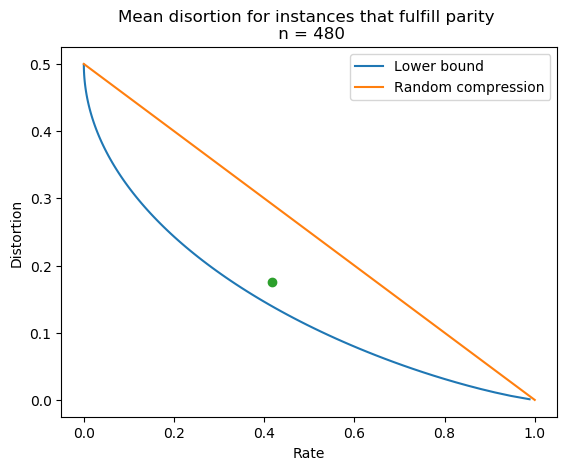

In [43]:
plot(sim6);

### Varying Rate

In [39]:
q = 2
n = 420
L = 0.1
nedges = [n*2, n*2, n*2, n*2]
lambda = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
rho = [[0, 0.5, 0.5], [0, 0, 0.5, 0.5], [0, 0, 0, 0.5, 0.5], [0, 0, 0, 0, 0, 0.5, 0.5]]
[sum(rho[x][j]/j for j in eachindex(rho[x])) for x in eachindex(rho)]
m = Int.(round.([nedges[x]*sum(rho[x][j]/j for j in eachindex(rho[x])) for x in eachindex(rho)]));

In [40]:
sim2 = Simulation(MS(), q, n, m, L, nedges, lambda, rho, 
    navg=20, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)

---- Starting m = 350 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 245 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 189 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 130 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20


Simulation with n = 420, average over 20 trials
k = [70, 175, 231, 290]
R = [0.17, 0.42, 0.55, 0.69]
Total elapsed time: 9m 30s

---------------------------------------------
	    k = 70  /  R = 0.17
---------------------------------------------

Runtime: 1m 15s. Average runtime per instance: 0m 4s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  20   │    5     │    15    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   5   │    5     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  15   │    0     │    15    │
└───────────────┴───────┴──────────┴──────────┘
---------------------------------------------
	    k = 175  /  R = 0.42
---------------------------------------------

Runtime: 1m 47s. Average runtime per instance: 0m 5s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │


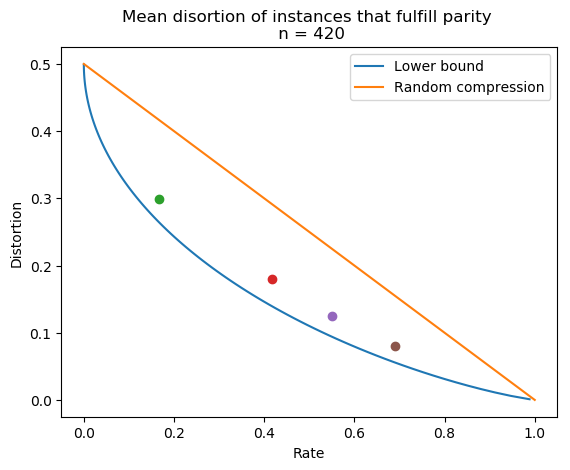

In [60]:
plot(sim2);

## Convergence: messages

### Fixed Rate

Try with tol = 1e-6

In [42]:
q = 2
n = 480
L = 0.1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [43]:
sim3 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=20, convergence=:messages, maxiter=Int(1e4), tol=1e-6, verbose = true)

---- Starting m = 280 ----
BP/MS unconverged after 10000 steps. Max change in messages: 0.0001245800320885948
BP/MS unconverged after 10000 steps. Max change in messages: 0.0004982771069856895
BP/MS unconverged after 10000 steps. Max change in messages: 3.0948335920655268e-6
BP/MS unconverged after 10000 steps. Max change in messages: 0.0001839325191239638
BP/MS unconverged after 10000 steps. Max change in messages: 8.415869239541962e-5
Finished iter 5
BP/MS unconverged after 10000 steps. Max change in messages: 0.09893274246467865
BP/MS unconverged after 10000 steps. Max change in messages: 8.17498297989161e-5
BP/MS unconverged after 10000 steps. Max change in messages: 0.0996785039949577
BP/MS unconverged after 10000 steps. Max change in messages: 0.00014840132162152742
BP/MS unconverged after 10000 steps. Max change in messages: 0.0002277926596478963
Finished iter 10
BP/MS unconverged after 10000 steps. Max change in messages: 0.0001934127052347634
BP/MS unconverged after 10000 step

Simulation with n = 480, average over 20 trials
k = [200]
R = [0.42]
Total elapsed time: 32m 13s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 32m 13s. Average runtime per instance: 1m 37s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  20   │    11    │    9     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   0   │    0     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  20   │    11    │    9     │
└───────────────┴───────┴──────────┴──────────┘


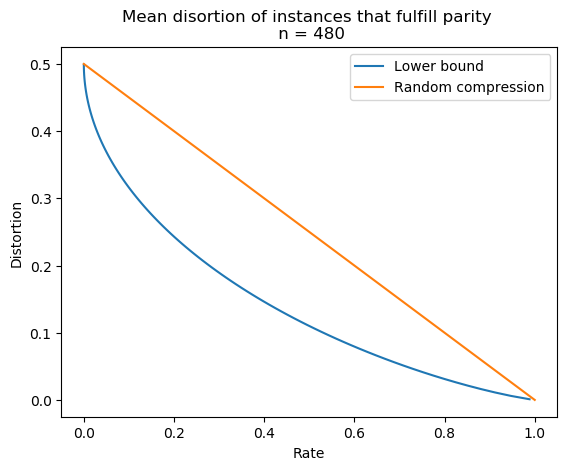

In [61]:
plot(sim3);

Try with tol = 1e-5 to see if more instances converge

In [45]:
sim4 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=20, convergence=:messages, maxiter=Int(1e4), tol=1e-5, verbose = true)

---- Starting m = 280 ----
BP/MS unconverged after 10000 steps. Max change in messages: 0.09949351406728191
BP/MS unconverged after 10000 steps. Max change in messages: 0.1996149481789995
BP/MS unconverged after 10000 steps. Max change in messages: 0.09841378391594535
BP/MS unconverged after 10000 steps. Max change in messages: 0.09655449063887112
BP/MS unconverged after 10000 steps. Max change in messages: 7.150890231244489e-5
Finished iter 5
BP/MS unconverged after 10000 steps. Max change in messages: 0.09724647738413683
BP/MS unconverged after 10000 steps. Max change in messages: 1.6996516261080785e-5
BP/MS unconverged after 10000 steps. Max change in messages: 0.00016092779888365882
BP/MS unconverged after 10000 steps. Max change in messages: 0.00033962828958844504
BP/MS unconverged after 10000 steps. Max change in messages: 0.00021300504179322388
Finished iter 10
BP/MS unconverged after 10000 steps. Max change in messages: 0.0004755347465885684
BP/MS unconverged after 10000 steps.

Simulation with n = 480, average over 20 trials
k = [200]
R = [0.42]
Total elapsed time: 32m 4s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 32m 4s. Average runtime per instance: 1m 36s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  20   │    7     │    13    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   0   │    0     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  20   │    7     │    13    │
└───────────────┴───────┴──────────┴──────────┘


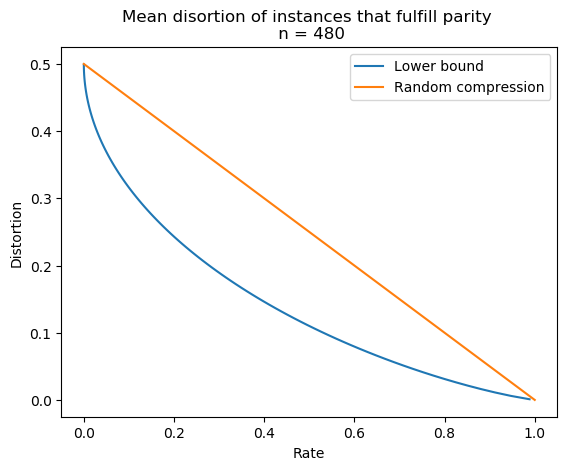

In [62]:
plot(sim4);

Try with tol = 1e-4 to see if more instances converge

In [63]:
sim5 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=20, convergence=:messages, maxiter=Int(1e4), tol=1e-4, verbose = true)

---- Starting m = 280 ----
Multi-edge discarded
BP/MS converged after 41 steps
BP/MS unconverged after 10000 steps. Max change in messages: 0.09723819174729442
BP/MS converged after 42 steps
BP/MS unconverged after 10000 steps. Max change in messages: 0.0001278097112829002
BP/MS unconverged after 10000 steps. Max change in messages: 0.09859377452014506
Finished iter 5
BP/MS converged after 6424 steps
BP/MS unconverged after 10000 steps. Max change in messages: 0.09872659947552798
BP/MS unconverged after 10000 steps. Max change in messages: 0.0002882543871134402
BP/MS unconverged after 10000 steps. Max change in messages: 0.0001216814373048436
BP/MS unconverged after 10000 steps. Max change in messages: 0.00013702760457157126
Finished iter 10
BP/MS unconverged after 10000 steps. Max change in messages: 0.00035844610651825093
BP/MS unconverged after 10000 steps. Max change in messages: 0.00010934474530310823
BP/MS converged after 46 steps
BP/MS converged after 52 steps
BP/MS unconverged 

Simulation with n = 480, average over 20 trials
k = [200]
R = [0.42]
Total elapsed time: 27m 48s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 27m 47s. Average runtime per instance: 1m 23s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  20   │    7     │    13    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   8   │    6     │    2     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  12   │    1     │    11    │
└───────────────┴───────┴──────────┴──────────┘


1e-4 is too large! Indeed it's the same order as the noise

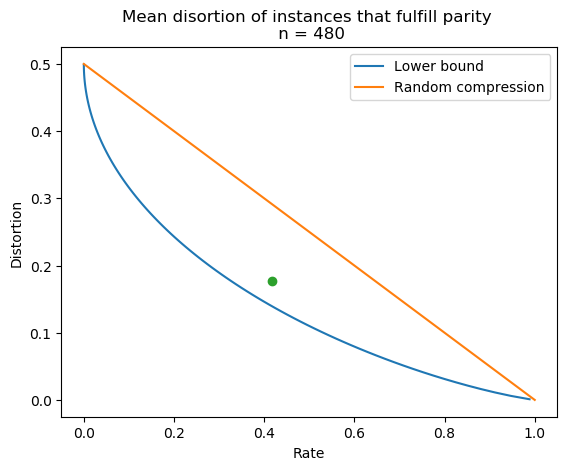

In [64]:
plot(sim5);